## Veri Seti hazırlanması (Bitcoin)
---



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader as dr
from datetime import date

In [ ]:
start_date="2017-11-08"
end_date=date.today()
btcusd=dr.data.get_data_yahoo('TRY=X',start=start_date,end=end_date)
btcusd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-08,3.89967,3.85530,3.88300,3.88293,0.0,3.88293
2017-11-09,3.87840,3.83800,3.86550,3.86550,0.0,3.86550
2017-11-10,3.87930,3.84720,3.86252,3.86105,0.0,3.86105
2017-11-13,3.88821,3.84967,3.85273,3.85811,0.0,3.85811
2017-11-14,3.90897,3.86130,3.86850,3.86850,0.0,3.86850


In [ ]:
btcusd.index=pd.to_datetime(btcusd.index)

In [ ]:
btcusd.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-23,8.42460,8.37030,8.41620,8.41630,0.0,8.41630
2021-05-24,8.47750,8.37430,8.37900,8.37797,0.0,8.37797
2021-05-25,8.46431,8.41210,8.44684,8.45230,0.0,8.45230
2021-05-26,8.53570,8.42499,8.45130,8.45120,0.0,8.45120
2021-05-28,8.61115,8.47210,8.48760,8.60773,0.0,8.60773


In [ ]:
!pip3 install mpl_finance
import mpl_finance as mpf
import matplotlib.dates as mdates

In [ ]:

btcusd.index = pd.to_datetime(btcusd.index)

pdates = mdates.date2num(btcusd.index)
dvalues = btcusd[['Open', 'Close', 'High', 'Low']].values.tolist()

ochl = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]



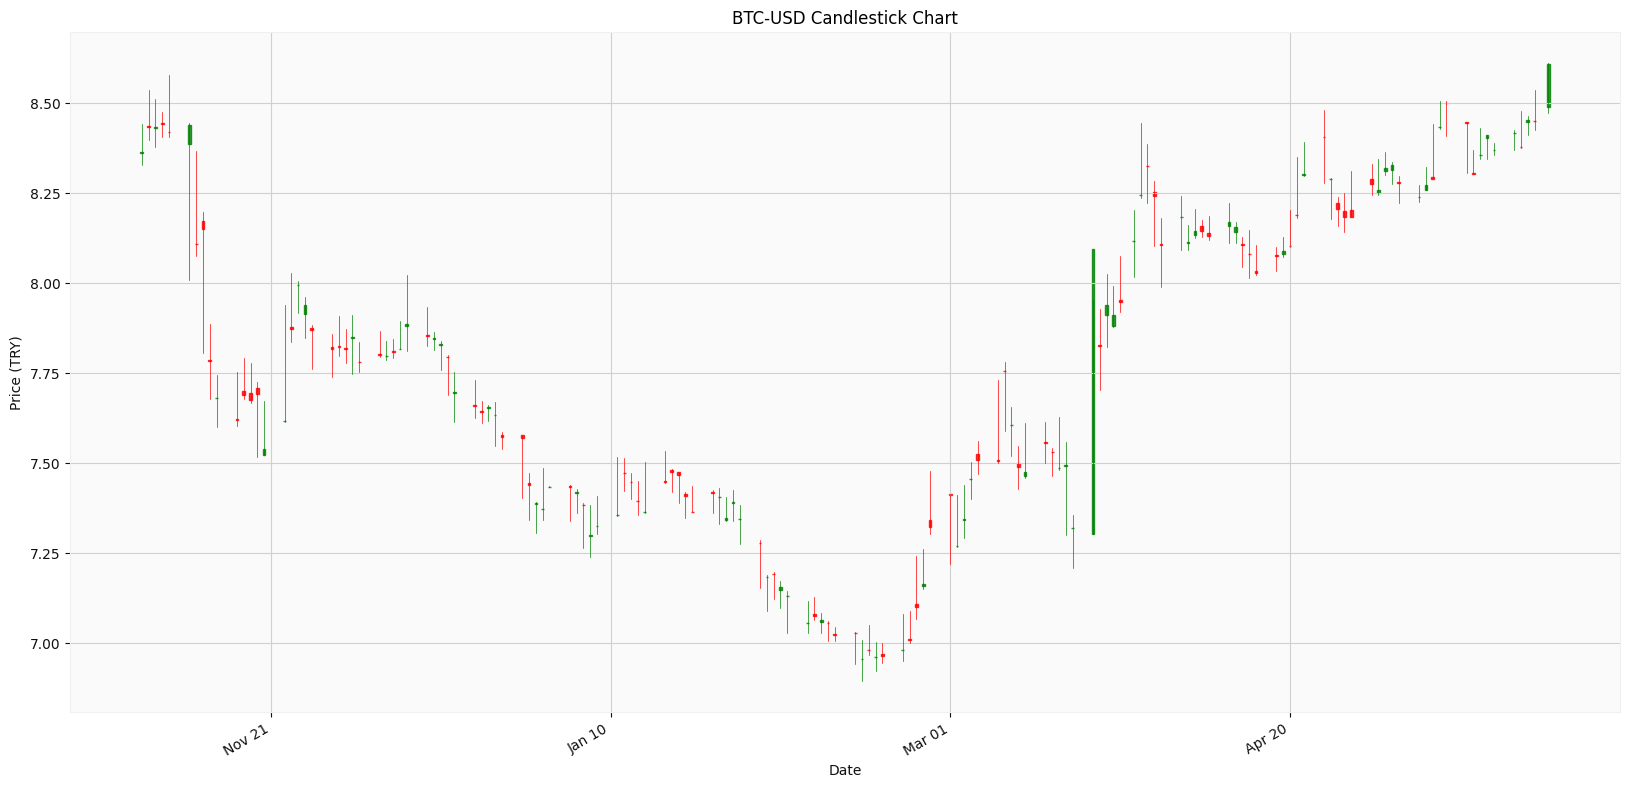

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

mpf.candlestick_ochl(ax,ochl[-150:], width=0.4,colorup='green', colordown='red', alpha=0.8)

ax.set_xlabel('Date')
ax.set_ylabel('Price (TRY)')
ax.set_title('BTC-USD Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

## closed data line chart  | moving average

In [ ]:
btcusd['5d'] = btcusd['Adj Close'].rolling(5).mean()
btcusd['14d'] = btcusd['Adj Close'].rolling(14).mean()
btcusd['21d'] = btcusd['Adj Close'].rolling(21).mean()


In [ ]:
btcusd.head()

,High,Low,Open,Close,Volume,Adj Close,5d,14d,21d
Date,,,,,,,,,
2017-11-08,3.89967,3.85530,3.88300,3.88293,0.0,3.88293,NaN,NaN,NaN
2017-11-09,3.87840,3.83800,3.86550,3.86550,0.0,3.86550,NaN,NaN,NaN
2017-11-10,3.87930,3.84720,3.86252,3.86105,0.0,3.86105,NaN,NaN,NaN
2017-11-13,3.88821,3.84967,3.85273,3.85811,0.0,3.85811,NaN,NaN,NaN
2017-11-14,3.90897,3.86130,3.86850,3.86850,0.0,3.86850,3.867218,NaN,NaN


In [ ]:
btcusd.dropna()

,High,Low,Open,Close,Volume,Adj Close,5d,14d,21d
Date,,,,,,,,,
2017-12-07,3.87142,3.84765,3.84990,3.85010,0.0,3.85010,3.881468,3.912716,3.898268
2017-12-08,3.87166,3.82510,3.86260,3.86505,0.0,3.86505,3.871190,3.912481,3.897417
2017-12-11,3.83850,3.81638,3.83700,3.83710,0.0,3.83710,3.853730,3.906089,3.896064
2017-12-12,3.85703,3.82289,3.83166,3.83107,0.0,3.83107,3.844964,3.896851,3.894637
2017-12-13,3.86359,3.82510,3.84590,3.84580,0.0,3.84580,3.845824,3.891715,3.894050
...,...,...,...,...,...,...,...,...,...
2021-05-23,8.42460,8.37030,8.41620,8.41630,0.0,8.41630,8.370674,8.353909,8.321926
2021-05-24,8.47750,8.37430,8.37900,8.37797,0.0,8.37797,8.385864,8.358099,8.320583
2021-05-25,8.46431,8.41210,8.44684,8.45230,0.0,8.45230,8.405296,8.366906,8.328298


In [ ]:
!pip3 install mplfinance
import mplfinance as mplf

In [ ]:
mplf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

/usr/local/lib/python3.7/dist-packages/mplfinance/plotting.py:535: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


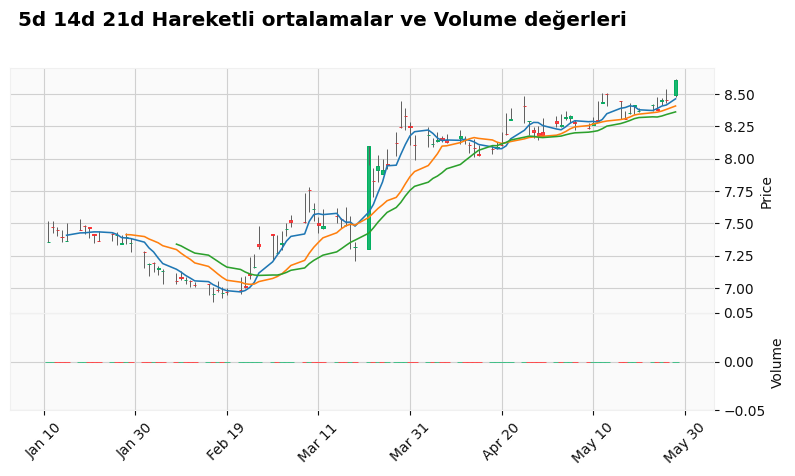

In [ ]:
kwargs = dict(type='candle',mav=(5,14,21),volume=True,figratio=(20,10),figscale=0.85)
mplf.plot(btcusd[-100:],**kwargs,
          style='yahoo',
          show_nontrading = True,
          title= "5d 14d 21d Hareketli ortalamalar ve Volume değerleri" )


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install


--2021-05-28 12:31:59--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-05-28 12:31:59--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-05-28 12:31:59--  https://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuate

In [ ]:
!pip install TA-Lib
import talib

     |████████████████████████████████| 276kB 28.8MB/s 
  Created wheel for TA-Lib: filename=TA_Lib-0.4.20-cp37-cp37m-linux_x86_64.whl size=1436188 sha256=fc501b5f946d191af2e76d2caddd8b3dc5d9b8f43b97a0593daef1619fd7ffe5
  Stored in directory: /root/.cache/pip/wheels/d9/2f/34/7636a227222011ad010012e6bdf3a2abfaf1da255d9bdd532b
Successfully built TA-Lib


In [ ]:
btcusd["macd"], btcusd["macd_signal"], btcusd["macd_hist"] = talib.MACD(btcusd['Adj Close'])
   

In [ ]:
btcusd["rsi"] = talib.RSI(btcusd["Adj Close"])
btcusd.dropna()

,High,Low,Open,Close,Volume,Adj Close,5d,14d,21d,macd,macd_signal,macd_hist,rsi
Date,,,,,,,,,,,,,
2017-12-26,3.81706,3.79705,3.80660,3.80640,0.0,3.80640,3.817390,3.835559,3.860987,-0.021882,-0.014871,-0.007010,41.205111
2017-12-27,3.82700,3.80450,3.80720,3.80702,0.0,3.80702,3.812474,3.832482,3.856316,-0.022727,-0.016442,-0.006285,41.342698
2017-12-28,3.82404,3.76430,3.81415,3.81490,0.0,3.81490,3.811124,3.828900,3.849192,-0.022502,-0.017654,-0.004847,43.163501
2017-12-29,3.79695,3.76680,3.77539,3.77686,0.0,3.77686,3.802976,3.824597,3.840660,-0.025103,-0.019144,-0.005959,37.165810
2018-01-01,3.79490,3.78900,3.79490,3.79490,0.0,3.79490,3.800016,3.822014,3.834872,-0.025417,-0.020399,-0.005018,41.329402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-23,8.42460,8.37030,8.41620,8.41630,0.0,8.41630,8.370674,8.353909,8.321926,0.079400,0.086284,-0.006884,58.818360
2021-05-24,8.47750,8.37430,8.37900,8.37797,0.0,8.37797,8.385864,8.358099,8.320583,0.074909,0.084009,-0.009100,56.139724
2021-05-25,8.46431,8.41210,8.44684,8.45230,0.0,8.45230,8.405296,8.366906,8.328298,0.076466,0.082500,-0.006035,59.948862


In [ ]:
from mplfinance.original_flavor import candlestick_ochl

# Filter number of observations to plot


btcusd_lastn=btcusd.iloc[-150:]


btcusd_lastn



,High,Low,Open,Close,Volume,Adj Close,5d,14d,21d,macd,macd_signal,macd_hist,rsi
Date,,,,,,,,,,,,,
2020-11-02,8.44179,8.32813,8.36077,8.36349,0.0,8.36349,8.241854,8.023771,7.960063,0.161490,0.127169,0.034321,80.574162
2020-11-03,8.53670,8.39631,8.43615,8.43361,0.0,8.43361,8.310532,8.060407,7.993253,0.176382,0.137012,0.039370,82.307763
2020-11-04,8.51182,8.37788,8.43110,8.43200,0.0,8.43200,8.358392,8.097964,8.025253,0.185910,0.146792,0.039119,82.126559
2020-11-05,8.47400,8.40457,8.44440,8.44050,0.0,8.44050,8.393508,8.134364,8.056312,0.191935,0.155820,0.036115,82.347547
2020-11-06,8.57800,8.40610,8.42080,8.42040,0.0,8.42040,8.418000,8.170657,8.082393,0.192864,0.163229,0.029635,79.833821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-23,8.42460,8.37030,8.41620,8.41630,0.0,8.41630,8.370674,8.353909,8.321926,0.079400,0.086284,-0.006884,58.818360
2021-05-24,8.47750,8.37430,8.37900,8.37797,0.0,8.37797,8.385864,8.358099,8.320583,0.074909,0.084009,-0.009100,56.139724
2021-05-25,8.46431,8.41210,8.44684,8.45230,0.0,8.45230,8.405296,8.366906,8.328298,0.076466,0.082500,-0.006035,59.948862


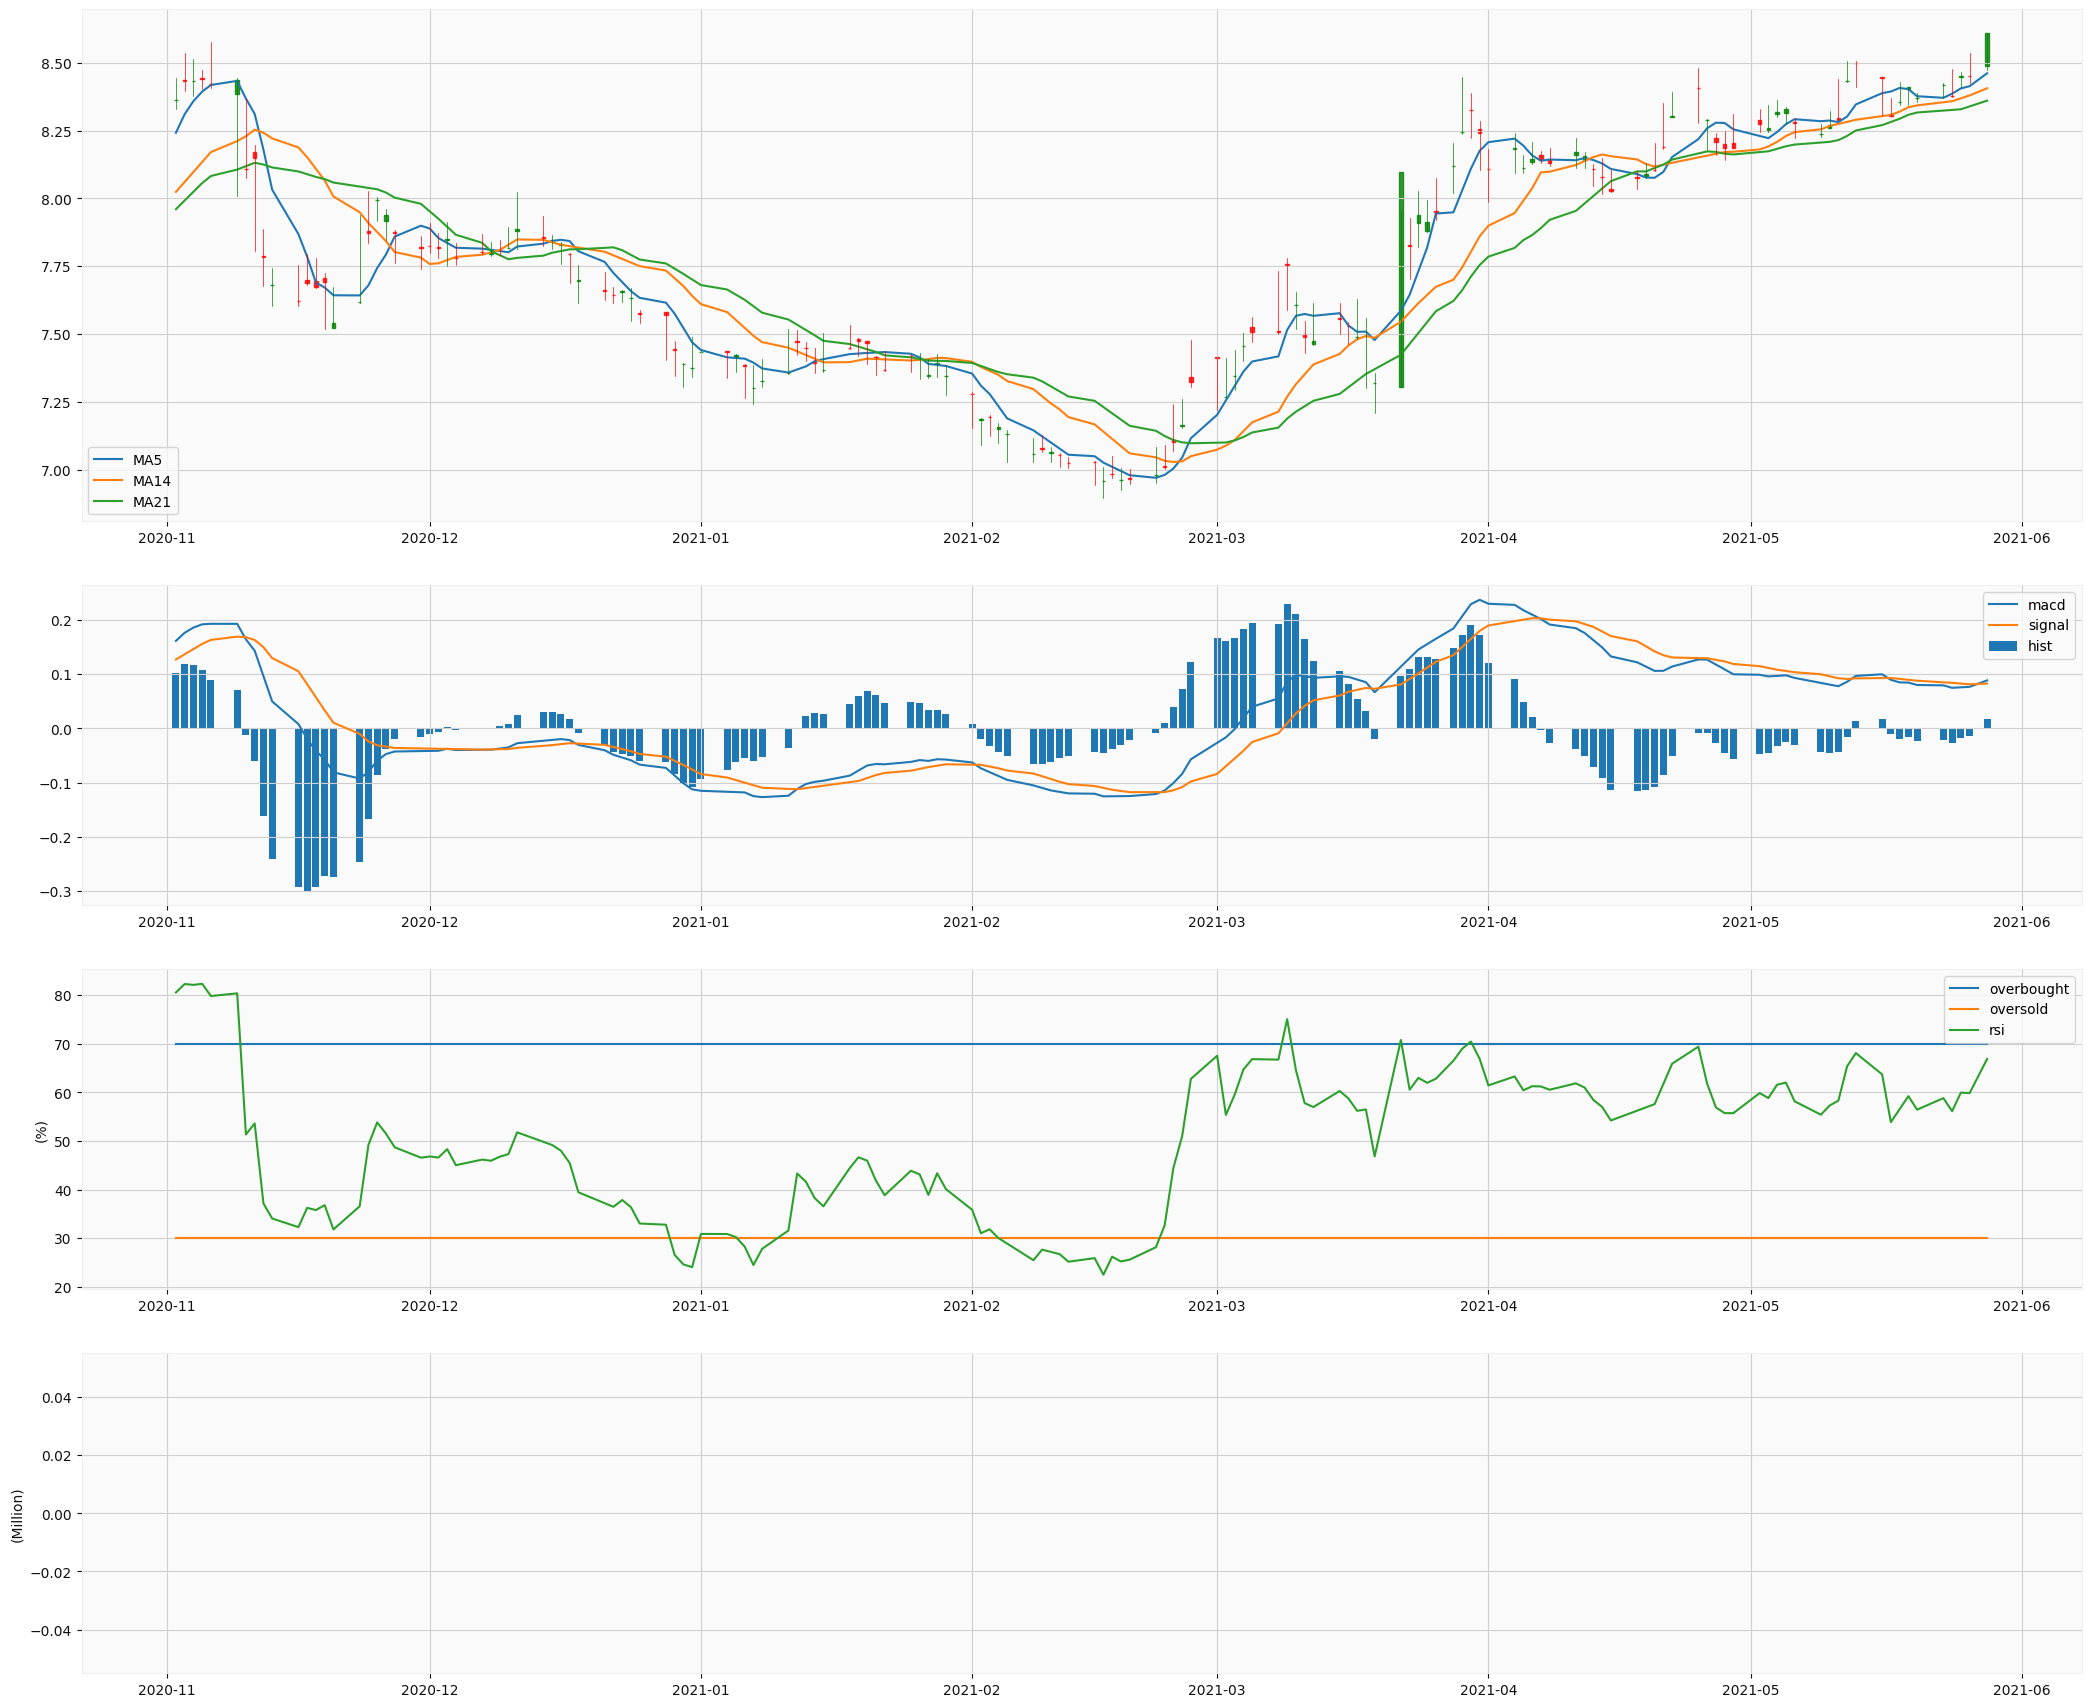

In [ ]:

    

        
    # Create figure and set axes for subplots
fig= plt.figure()
fig.set_size_inches((20, 16))
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    
    # Format x-axis ticks as dates
ax_vol.xaxis_date()    

  
    # Plot candlestick chart
ax_candle.plot(btcusd_lastn.index, btcusd_lastn["5d"], label="MA5")
ax_candle.plot(btcusd_lastn.index, btcusd_lastn["14d"], label="MA14")
ax_candle.plot(btcusd_lastn.index, btcusd_lastn["21d"], label="MA21")

candlestick_ochl(ax_candle ,ochl[-150:], colorup="g", colordown="r", width=0.4,alpha=0.8)
ax_candle.legend()
    
    # Plot MACD
ax_macd.plot(btcusd_lastn.index, btcusd_lastn["macd"], label="macd")
ax_macd.bar(btcusd_lastn.index, btcusd_lastn["macd_hist"] * 3, label="hist")
ax_macd.plot(btcusd_lastn.index, btcusd_lastn["macd_signal"], label="signal")
ax_macd.legend()
    
# Plot RSI
# Above 70% = overbought, below 30% = oversold
ax_rsi.set_ylabel("(%)")
ax_rsi.plot(btcusd_lastn.index, [70] * len(btcusd_lastn.index), label="overbought")
ax_rsi.plot(btcusd_lastn.index, [30] * len(btcusd_lastn.index), label="oversold")
ax_rsi.plot(btcusd_lastn.index, btcusd_lastn["rsi"], label="rsi")
ax_rsi.legend()
    
    # Show volume in millions
ax_vol.bar(btcusd_lastn.index, btcusd_lastn["Volume"]/1000000)
ax_vol.set_ylabel("(Million)")
   
    # Save the chart as PNG
fig.autofmt_xdate()
fig.savefig( "BTC-USD" + ".png", bbox_inches="tight")
plt.show()
  